# Passo Variável

## Aplicação: Pêndulo Forçado

$$\Delta t_{novo} = \Delta t \left( \frac{tol}{\epsilon_c}\right)^{1/n}$$

$$\epsilon_c = \sqrt{(\Delta x - \delta x)^2}$$

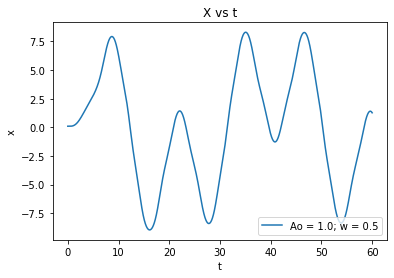

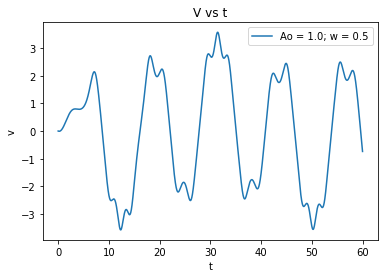

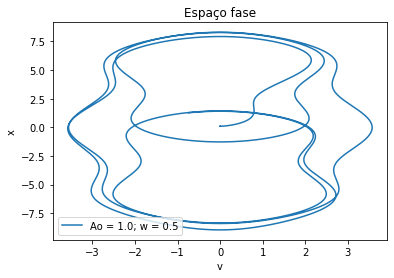

In [29]:
import matplotlib.pyplot as plt
import numpy as np


def fV(A_o,w,x,t,w_o=1.0):
    return (-(w_o**2)*np.sin(x) + A_o*np.sin(w*t))

def fX(v):
    return v


def rk2_x_v(A_o,x,v,w,t,dt):
    k1X = fX(v)
    k1V = fV(A_o,w,x,t)
    xaux = x + k1X*dt/2
    vaux = v + k1V*dt/2
    k2X = fX(vaux)
    k2V = fV(A_o,w,xaux,t + dt/2)
    v = v + k2V*dt
    x = x + k2X*dt
    return x,v

def rk4_x_v(A_o,x,v,w,t,dt):
    k1X = fX(v)
    k1V = fV(A_o,w,x,t)
    xaux = x + k1X*dt/2
    vaux = v + k1V*dt/2
    k2X = fX(vaux)
    k2V = fV(A_o,w,xaux,t+dt/2)
    xaux = x +  k2X*dt/2
    vaux = v + k2V*dt/2
    k3X = fX(vaux)
    k3V = fV(A_o,w,xaux,t + dt/2)
    xaux = x +  k3X*dt
    vaux = v + k3X*dt
    k4X = fX(vaux)
    k4V = fV(A_o,w,xaux,t+dt)
    
    v = v + (1/6)*(k1V + 2*k2V + 2*k3V + k4V)*dt
    x = x + (1/6)*(k1X + 2*k2X + 2*k3X + k4X)*dt
    
    return x,v


#condições iniciais
l = 10
g = 10
w = 0.5
w_0 = 1.0
w = 0.5
x_o = 0.1
v_o = 0
A_o = 1.0
dt = 1e-4
tf=60
tol = 1e-3
x_l = [x_o]
v_l = [v_o]
t_l = [0]


t = dt
x=x_o
v=v_o

i = 0
while(t < tf):
    #RK2 - Ponto Médio
    x,v = rk2_x_v(A_o,x,v,w,t,dt)
    
    if (i==4):
        
        xRK2, vRK2 = rk2_x_v(A_o,x,v,w,t,dt)
        
        #rk4 - clássico 
       
        xRK4, vRK4 = rk4_x_v(A_o,x,v,w,t,dt)
    
        e_cX = np.sqrt((xRK2 - xRK4)**2)
        e_cV = np.sqrt((vRK2 - vRK4)**2)
        error_list = [e_cX, e_cV]
        e_c = max(error_list)
        delta_tNovo = ((tol/e_c)**(1/3))*dt #ordem erro local RK2
        
        if(delta_tNovo > 2*dt):
            delta_tNovo = 2*dt
            
        elif(delta_tNovo < dt/2 ):
            delta_tNovo = dt/2
        
        dt = delta_tNovo
        i == 0
            
      
    i += 1 
    x_l.append(x)
    v_l.append(v)
    t_l.append(t)
    t += dt

plt.figure()
plt.plot(t_l,x_l,label="Ao = {0}; w = {1}".format(A_o,w))    
plt.title("X vs t".format(A_o,w))
plt.ylabel("x")
plt.xlabel("t")
plt.legend()

plt.figure()
plt.plot(t_l,v_l,label="Ao = {0}; w = {1}".format(A_o,w))    
plt.title("V vs t".format(A_o,w))
plt.ylabel("v")
plt.xlabel("t")
plt.legend()

plt.figure()
plt.plot(v_l,x_l,label="Ao = {0}; w = {1}".format(A_o,w))    
plt.title("Espaço fase".format(A_o,w))
plt.ylabel("x")
plt.xlabel("v")
plt.legend()

